# **Temporal Analysis**

In [ ]:
# Questions I'd like to answer

# What months or seasons see the most UFO sightings?
# Are sightings more common on weekends vs weekdays?
# Does time of day affect frequency (daylight vs nighttime sightings)?
# Are there any long-term trends (increase or decrease in reports over decades)?
# How does the duration of sightings change over time?

# **Dataset 1: From Kaggle**

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\git\DATA-501-Group-Project-UFO-Sightings-Data-Analysis\data\UFO sightings 1900-2024.csv')

df.head()

,sighting_id,date,location,shape,duration_seconds,description,nearest_airport_distance_km,evidence,credibility_score
0,1,1/15/1965,Brazil,Orb,2209,Mysterious bright light in the sky,218,Yes,9.95
1,2,2/16/1960,Australia,Triangle,3415,Mysterious bright light in the sky,58,Yes,7.08
2,3,12/10/1966,UK,Disc,313,Mysterious bright light in the sky,325,Yes,3.36
3,4,5/13/1928,India,Unknown,1710,Mysterious bright light in the sky,93,No,7.73
4,5,10/20/1949,Brazil,Cylinder,2471,Mysterious bright light in the sky,103,No,9.47


## **Exploratory Data Analysis**

## Basic EDA

In [2]:
df.columns

Index(['sighting_id', 'date', 'location', 'shape', 'duration_seconds',
       'description', 'nearest_airport_distance_km', 'evidence',
       'credibility_score'],
      dtype='object')

In [3]:
df.shape

(100000, 9)

In [7]:
df.isnull().sum()

sighting_id                    0
date                           0
location                       0
shape                          0
duration_seconds               0
description                    0
nearest_airport_distance_km    0
evidence                       0
credibility_score              0
dtype: int64

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

sighting_id                             int64
date                           datetime64[ns]
location                               object
shape                                  object
duration_seconds                        int64
description                            object
nearest_airport_distance_km             int64
evidence                               object
credibility_score                     float64
dtype: object

In [10]:
print(df['date'].min())
print(df['date'].max())


1900-01-01 00:00:00
2024-12-28 00:00:00


## Exploring date column

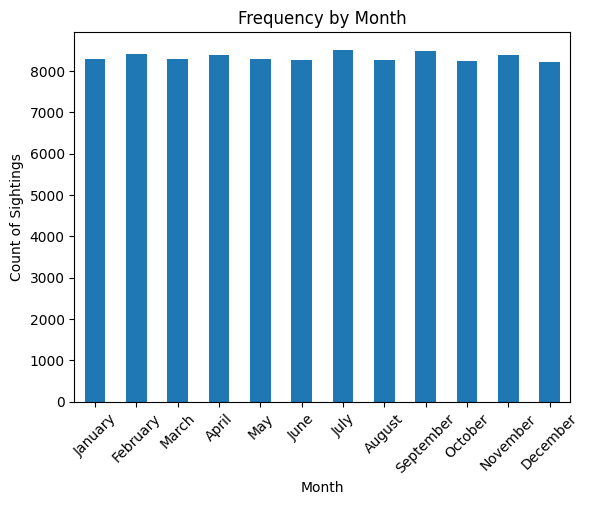

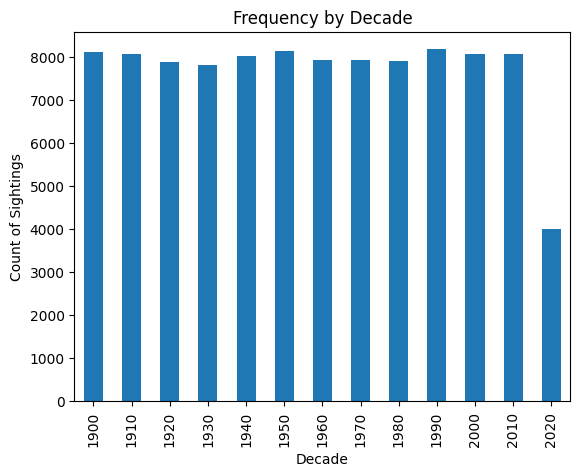

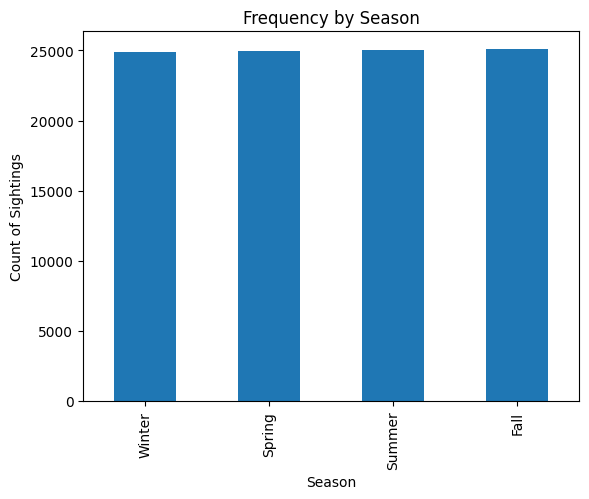

In [14]:
# --- 1. Frequency by Month (Jan–Dec, across all years) ---
plt.figure()
df['date'].dt.month_name().value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).plot(kind='bar')
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Count of Sightings')
plt.xticks(rotation=45)
plt.show()

# --- 2. Frequency by Decade ---
plt.figure()
decade = (df['date'].dt.year // 10) * 10
decade.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Sightings')
plt.show()

# --- 3. Frequency by Season ---
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].dt.month.map(get_season)

plt.figure()
df['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar')
plt.title('Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Count of Sightings')
plt.show()

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\1232352309.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M').size().plot()


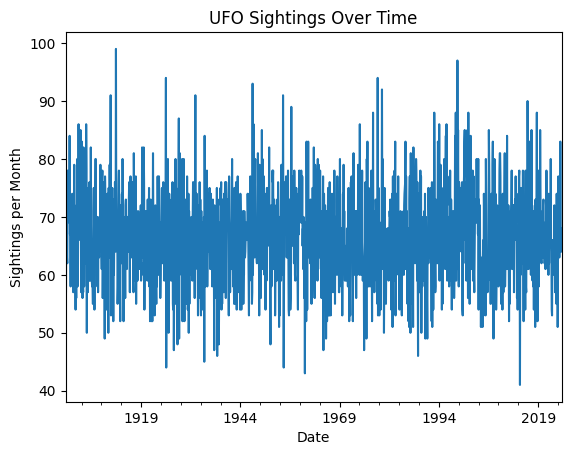

In [15]:
df.set_index('date').resample('M').size().plot()
plt.title('UFO Sightings Over Time')
plt.xlabel('Date')
plt.ylabel('Sightings per Month')
plt.show()

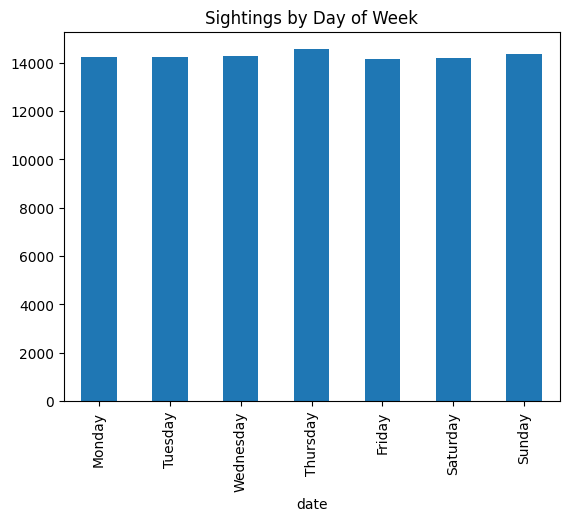

In [16]:
df['date'].dt.day_name().value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.title('Sightings by Day of Week')
plt.show()

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\3923096364.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index('date').resample('Y').size().cumsum().plot()


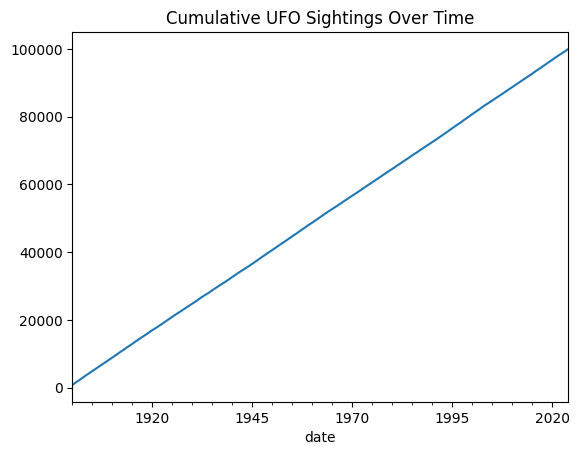

In [17]:
df.set_index('date').resample('Y').size().cumsum().plot()
plt.title('Cumulative UFO Sightings Over Time')
plt.show()


## **Explorting Location column**

In [18]:
df['location'].unique()

array(['Brazil', 'Australia', 'UK', 'India', 'China', 'Germany', 'Canada',
       'USA'], dtype=object)

In [19]:
# Basic counts and percentages
loc_counts = df['location'].value_counts()
loc_perc = df['location'].value_counts(normalize=True) * 100

eda_location = pd.DataFrame({
    'count': loc_counts,
    'percent': loc_perc.round(2)
})

print(eda_location)


           count  percent
location                 
China      12614    12.61
Canada     12558    12.56
India      12543    12.54
UK         12522    12.52
Brazil     12519    12.52
USA        12484    12.48
Germany    12438    12.44
Australia  12322    12.32


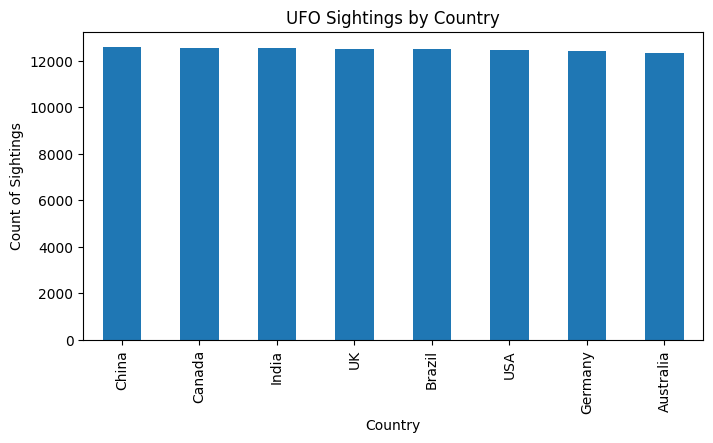

In [20]:
plt.figure(figsize=(8,4))
loc_counts.plot(kind='bar')
plt.title('UFO Sightings by Country')
plt.xlabel('Country')
plt.ylabel('Count of Sightings')
plt.show()


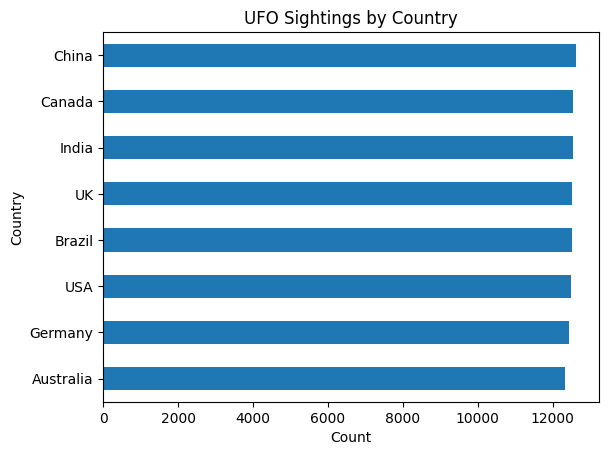

In [21]:
loc_counts.sort_values().plot(kind='barh')
plt.title('UFO Sightings by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


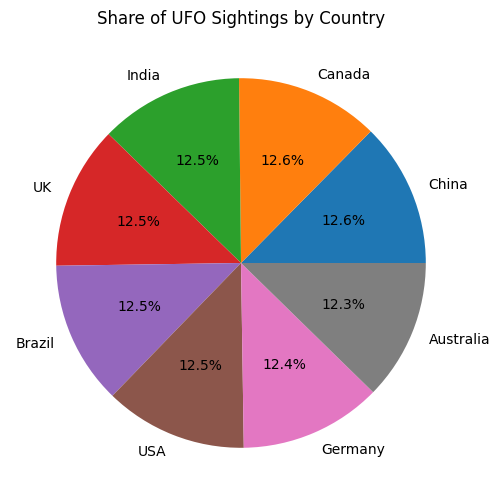

In [22]:
plt.figure(figsize=(6,6))
df['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Share of UFO Sightings by Country')
plt.show()


## Comparing date and location fields.

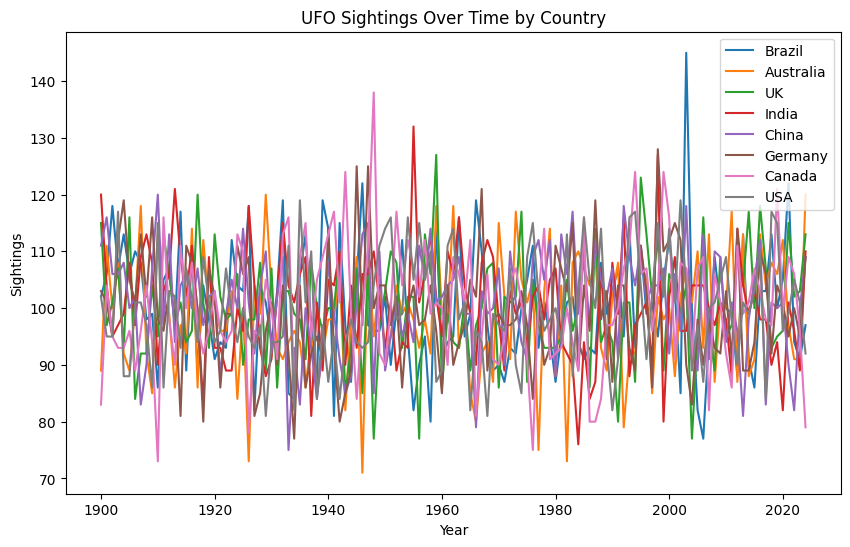

In [ ]:
# Group by year and location
sightings_by_year_loc = (
    df.groupby([df['date'].dt.year, 'location'])
      .size()
      .reset_index(name='count')
)

# Plot line chart
plt.figure(figsize=(10,6))
for loc in df['location'].unique():
    subset = sightings_by_year_loc[sightings_by_year_loc['location'] == loc]
    plt.plot(subset['date'], subset['count'], label=loc)

plt.title('UFO Sightings Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.legend()
plt.show()


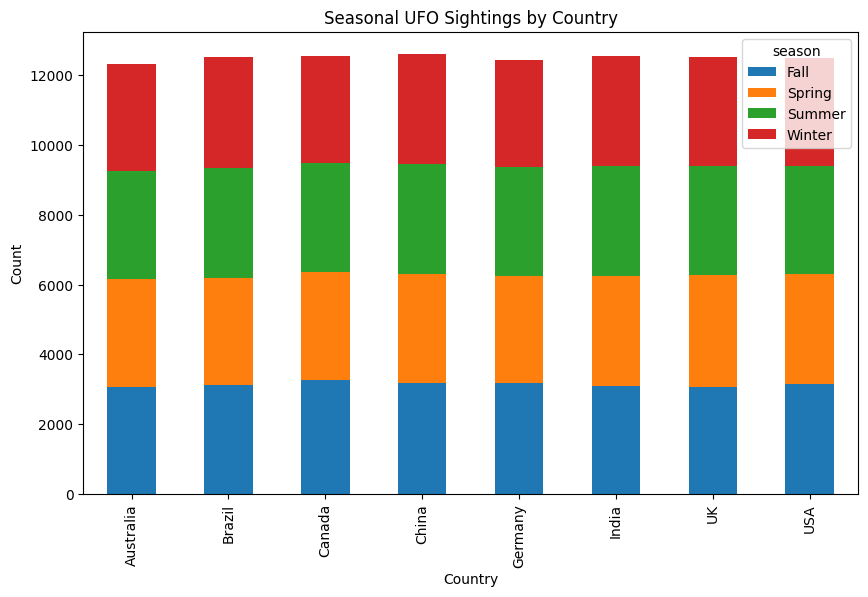

In [24]:
season_by_loc = df.groupby(['location', 'season']).size().unstack(fill_value=0)

season_by_loc.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Seasonal UFO Sightings by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


## Exploring shape column

In [25]:
df['shape'].unique()

array(['Orb', 'Triangle', 'Disc', 'Unknown', 'Cylinder'], dtype=object)

In [26]:
shape_counts = df['shape'].value_counts()
shape_perc = df['shape'].value_counts(normalize=True) * 100

eda_shape = pd.DataFrame({
    'count': shape_counts,
    'percent': shape_perc.round(2)
})

print(eda_shape)


          count  percent
shape                   
Triangle  20290    20.29
Disc      20180    20.18
Unknown   19905    19.90
Orb       19869    19.87
Cylinder  19756    19.76


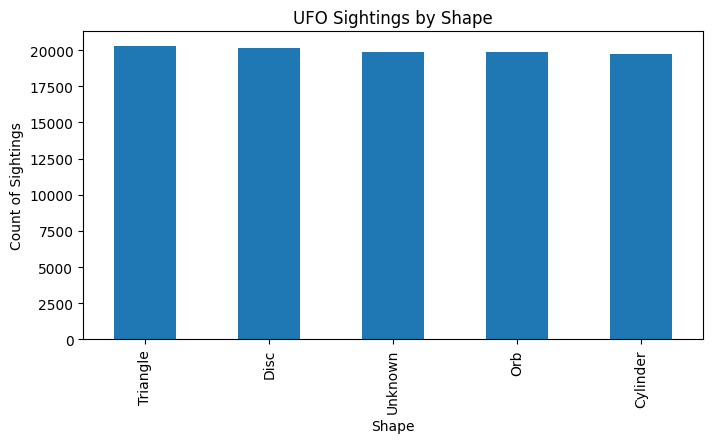

In [27]:
plt.figure(figsize=(8,4))
shape_counts.plot(kind='bar')
plt.title('UFO Sightings by Shape')
plt.xlabel('Shape')
plt.ylabel('Count of Sightings')
plt.show()


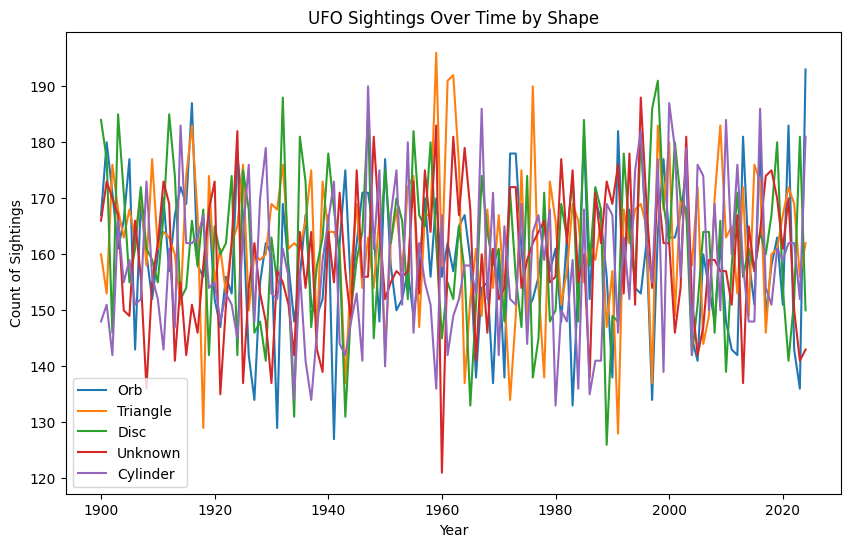

In [28]:
df['date'] = pd.to_datetime(df['date'])

sightings_by_year_shape = (
    df.groupby([df['date'].dt.year, 'shape'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(10,6))
for shape in df['shape'].unique():
    subset = sightings_by_year_shape[sightings_by_year_shape['shape'] == shape]
    plt.plot(subset['date'], subset['count'], label=shape)

plt.title('UFO Sightings Over Time by Shape')
plt.xlabel('Year')
plt.ylabel('Count of Sightings')
plt.legend()
plt.show()


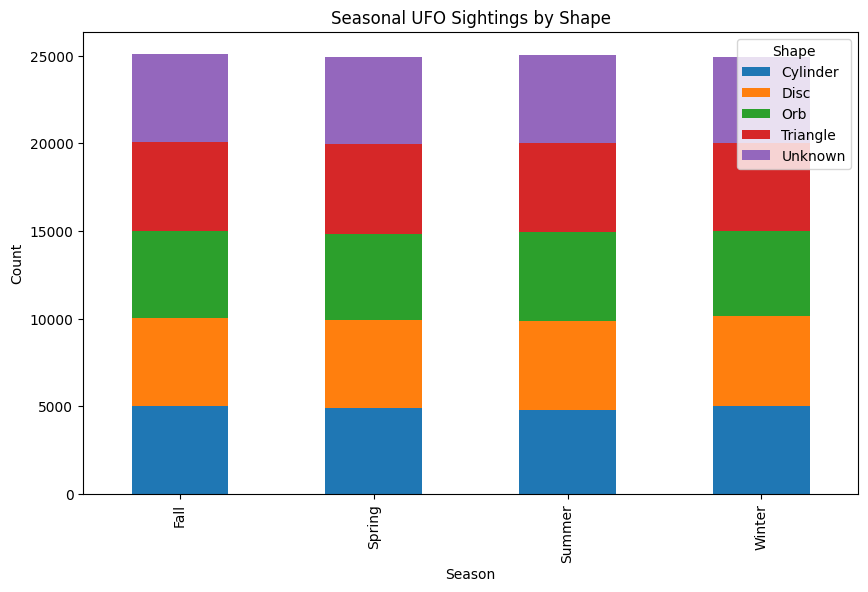

In [29]:
shape_season = df.groupby(['season', 'shape']).size().unstack(fill_value=0)
shape_season.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Seasonal UFO Sightings by Shape')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Shape')
plt.show()


In [30]:
print("Most common shape:", df['shape'].mode()[0])
print("Least common shape(s):")
print(df['shape'].value_counts().tail())
print()
print("Shape categories:", df['shape'].nunique())


Most common shape: Triangle
Least common shape(s):
shape
Triangle    20290
Disc        20180
Unknown     19905
Orb         19869
Cylinder    19756
Name: count, dtype: int64

Shape categories: 5


## Exploring duration_seconds column

array([   5.,  901., 1805., 2702., 3599.])

np.float64(-1800.5)

np.float64(5403.5)

Potential outliers: 0 (0.00% of total)


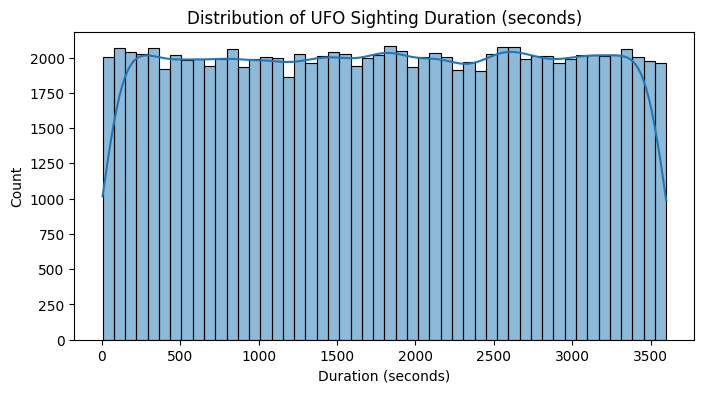

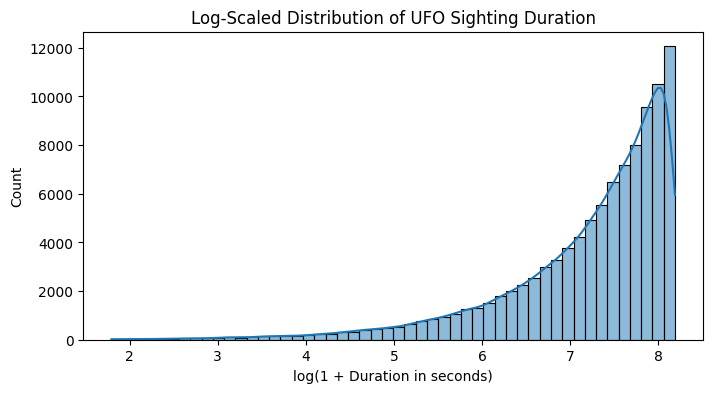

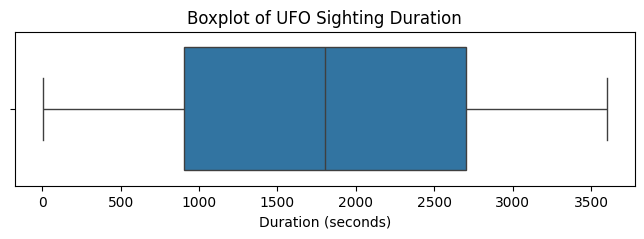

In [33]:
import numpy as np 
five_num_sum = np.percentile(df['duration_seconds'], [0, 25, 50, 75, 100])
q1 = five_num_sum[1]
q3 = five_num_sum[3]
iqr = q3-q1 
lf=q1-1.5*iqr 
uf=q3+1.5*iqr 
display(five_num_sum)
display(lf)
display(uf)

# --- Count potential outliers ---
outliers = df[(df['duration_seconds'] < lf) | (df['duration_seconds'] > uf)]
print(f"Potential outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of total)")
import seaborn as sns 
# --- Distribution plots ---
plt.figure(figsize=(8,4))
sns.histplot(df['duration_seconds'], bins=50, kde=True)
plt.title('Distribution of UFO Sighting Duration (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

# --- Log-scaled histogram (helps when data are heavily skewed) ---
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['duration_seconds']), bins=50, kde=True)
plt.title('Log-Scaled Distribution of UFO Sighting Duration')
plt.xlabel('log(1 + Duration in seconds)')
plt.ylabel('Count')
plt.show()

# --- Boxplot to visualize spread and outliers ---
plt.figure(figsize=(8,2))
sns.boxplot(x=df['duration_seconds'])
plt.title('Boxplot of UFO Sighting Duration')
plt.xlabel('Duration (seconds)')
plt.show()

In [ ]:
# EDA Notes 

# No null values in any column

# 'sighting_id': unique identifier from each row, can drop. index works fine. 
# 'date': Dates from 1-1-1900 to 12-28-2024. Relatively even distribution throughout time.
# 'location': Country of sighting. This data looks synthetic. It is, locationally, perfectly balanced. 
# 'shape': Shape of UFO.
# 'duration_seconds': Normal. Not spread out. 
# 'description'
# 'nearest_airport_distance_km'
# 'evidence'
# 'credibility_score'

In [ ]:
# I'm not a fan of this dataset. It looks synthetic. Going to search for more data. 

# **Exploring nuforc_highlights.csv**

In [37]:
df = pd.read_csv(r'C:\git\DATA-501-Group-Project-UFO-Sightings-Data-Analysis\data\nuforc_highlights.csv')

In [38]:
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Media,Explanation
0,Open !,10/06/2025 20:27,Skaneateles,NY,USA,Disk,"Spinning lights changing color, 40 foot long f...",NaN,NaN
1,Open !,10/05/2025 21:19,Joplin,MO,USA,Changing,Our location continues to have close encounter...,Y,NaN
2,Open !,10/05/2025 19:30,Houma,LA,USA,Disk,Strange object photographed from oil rig in th...,Y,NaN
3,Open !,10/03/2025 03:00,Bangkok,Krung Thep Maha Nakhon,Thailand,Other,I was in bed.I went to the bathroom.I see an s...,Y,NaN
4,Open !,09/30/2025 00:29,Lisbon,Lisbon,Portugal,Formation,Crafts coming out of the atlantic ocean,NaN,NaN


In [41]:
df['Occurred'] = pd.to_datetime(df['Occurred'])
df['date'] = df['Occurred']
df = df.drop(columns='Occurred')
df.dtypes

Link                   object
City                   object
State                  object
Country                object
Shape                  object
Summary                object
Media                  object
Explanation            object
date           datetime64[ns]
dtype: object

'df shape: '

(190385, 10)

'There are '

100

'unique dates'

'Null Counts: '

Link             1885
City             3770
State            3770
Country          1885
Shape            1885
Summary          1885
Media          109330
Explanation    175305
date             1885
season              0
dtype: int64

'Date Range: '

Timestamp('2025-01-03 18:00:00')

Timestamp('2025-10-06 20:27:00')

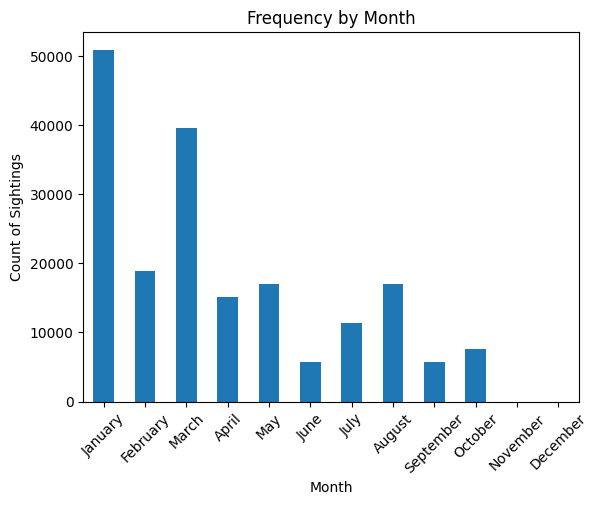

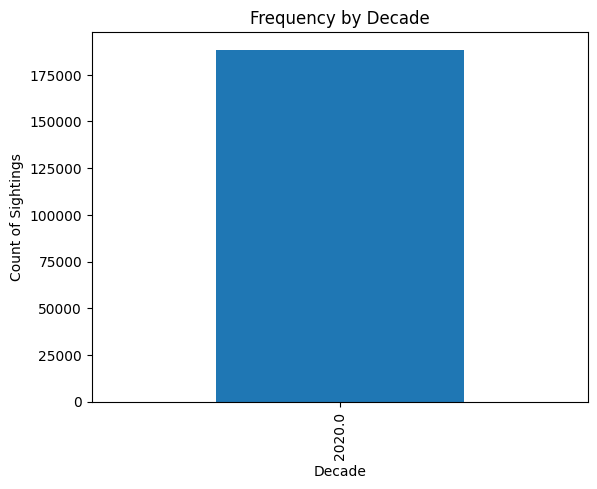

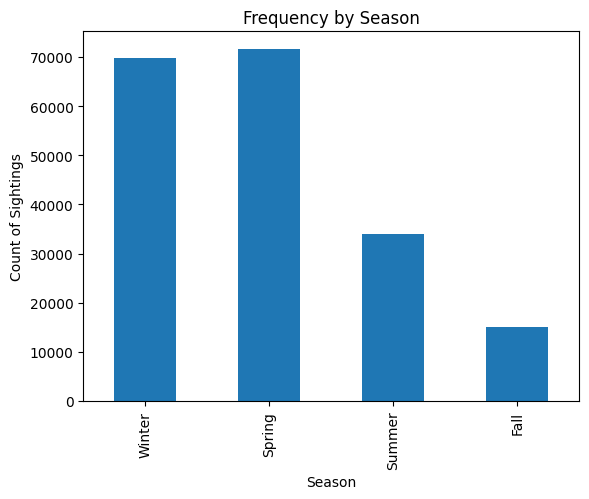

In [51]:
display("df shape: ", df.shape)
display("There are ", df['date'].nunique(), "unique dates")
display('Null Counts: ')
display(df.isnull().sum())
display("Date Range: ")
display(df['date'].min())
display(df['date'].max())

plt.figure()
df['date'].dt.month_name().value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).plot(kind='bar')
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Count of Sightings')
plt.xticks(rotation=45)
plt.show()

# --- 2. Frequency by Decade ---
plt.figure()
decade = (df['date'].dt.year // 10) * 10
decade.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Sightings')
plt.show()

# --- 3. Frequency by Season ---
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].dt.month.map(get_season)

plt.figure()
df['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar')
plt.title('Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Count of Sightings')
plt.show()

# The dataset has 190385 rows and 10 columns. 
# 100 unique dates
# 9 months worth of data

# This is the data from the NUFC website. I'm not sure we got a clean scrape, 
# I'll come back to this one. 

# **Kaggle UFO Data Complete**

In [82]:
df = pd.read_csv(r'C:\git\DATA-501-Group-Project-UFO-Sightings-Data-Analysis\data\kaggle_ufo_data\scrubbed.csv')
df['date'] = df['datetime']
df = df.drop(columns='datetime')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df['date posted'] = pd.to_datetime(df['date posted'], errors='coerce')
df.dtypes

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\510459434.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\git\DATA-501-Group-Project-UFO-Sightings-Data-Analysis\data\kaggle_ufo_data\scrubbed.csv')


city                            object
state                           object
country                         object
shape                           object
duration (seconds)             float64
duration (hours/min)            object
comments                        object
date posted             datetime64[ns]
latitude                        object
longitude                      float64
date                    datetime64[ns]
dtype: object

'df shape: '

(80332, 11)

'There are '

68955

'unique dates'

'Null Counts: '

city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         3
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
date                     694
dtype: int64

'Date Range: '

Timestamp('1906-11-11 00:00:00')

Timestamp('2014-05-08 18:45:00')

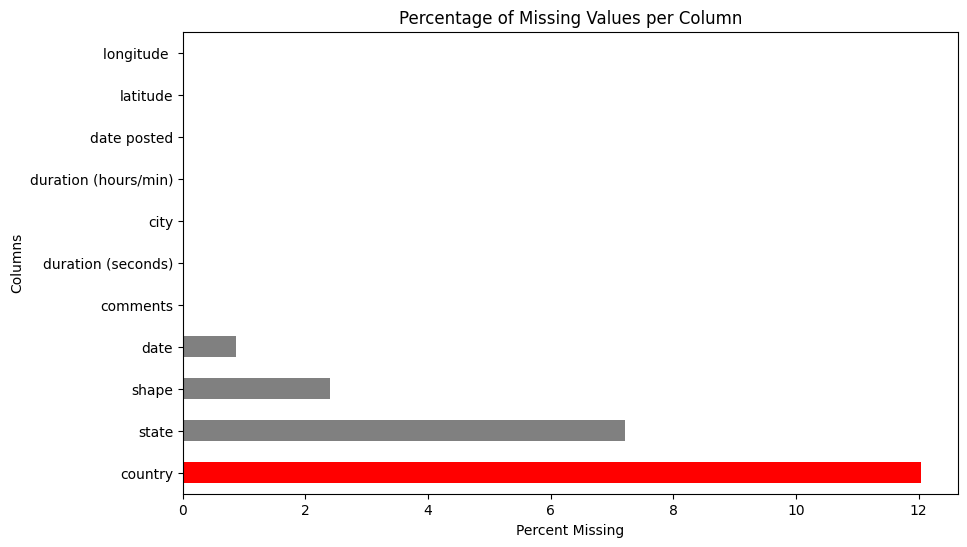

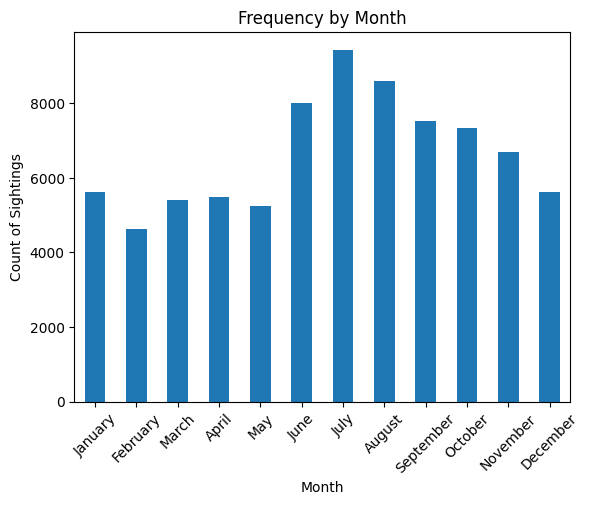

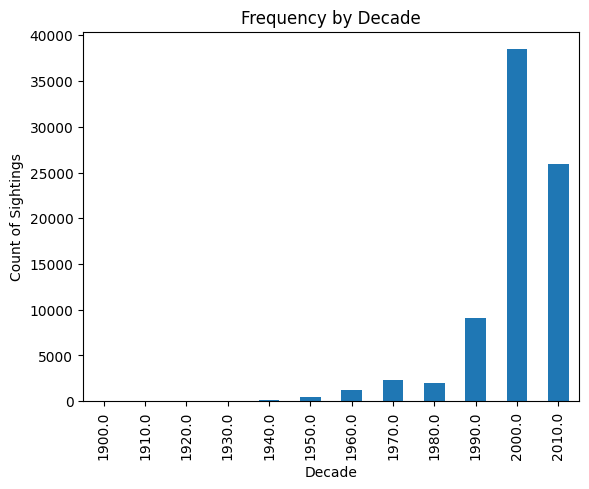

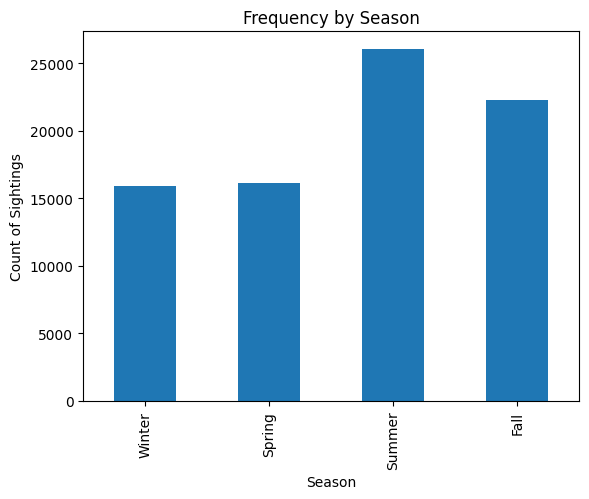

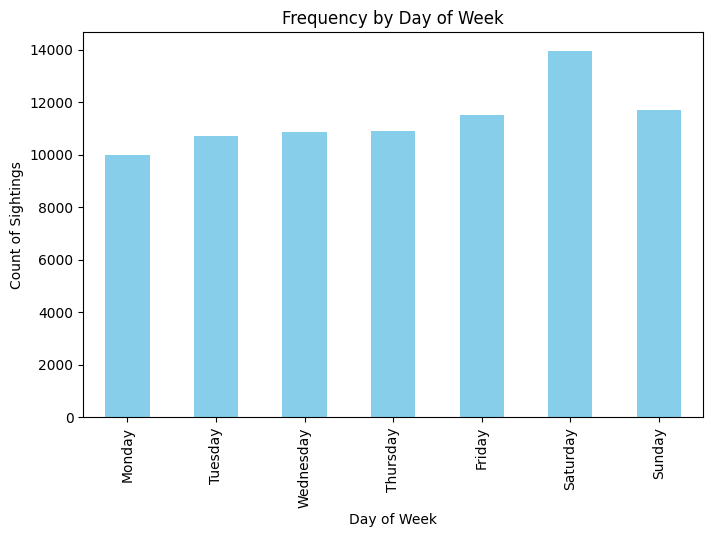

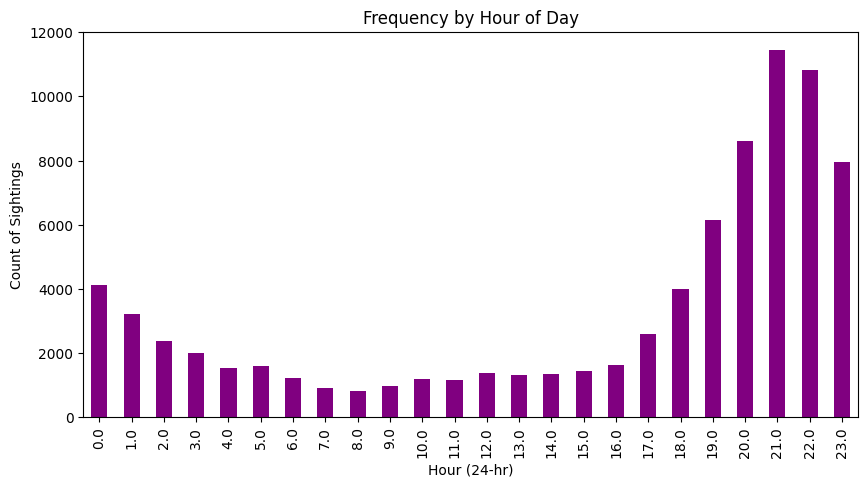

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\1512193882.py:82: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M').size().rolling(12).mean().plot()


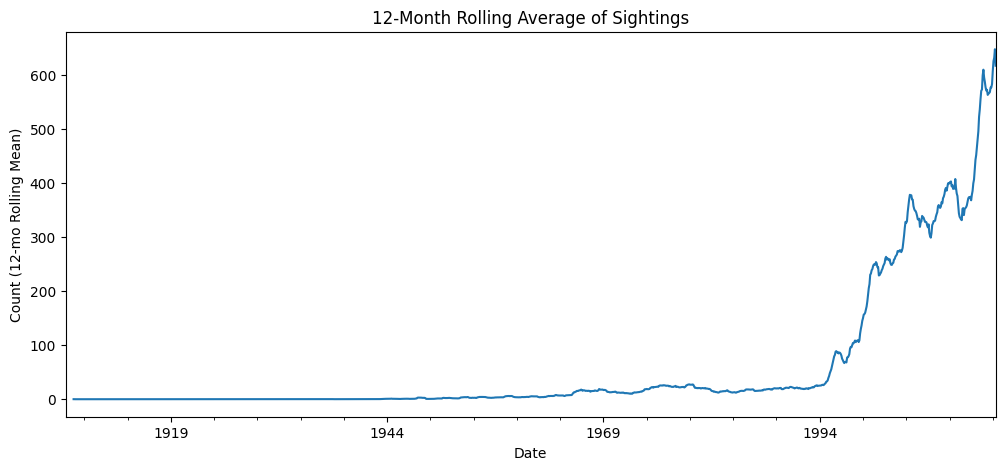

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\1512193882.py:88: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_counts = df.set_index('date').resample('Y').size()
C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\1512193882.py:90: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy = rolling.pct_change() * 100


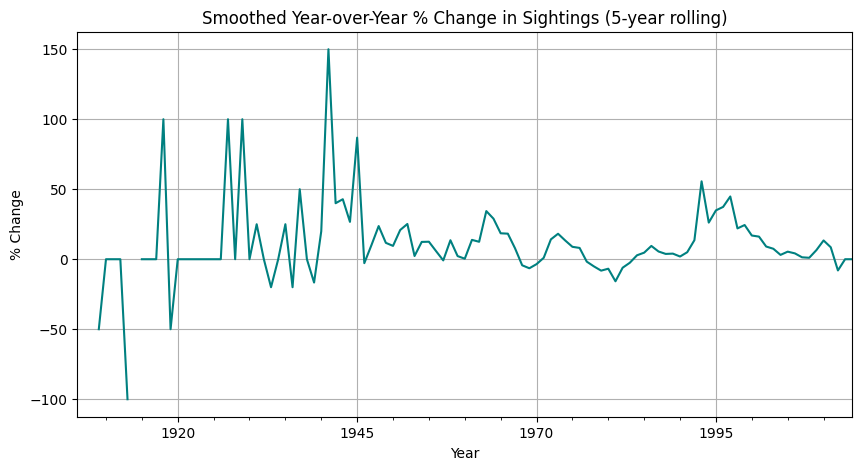

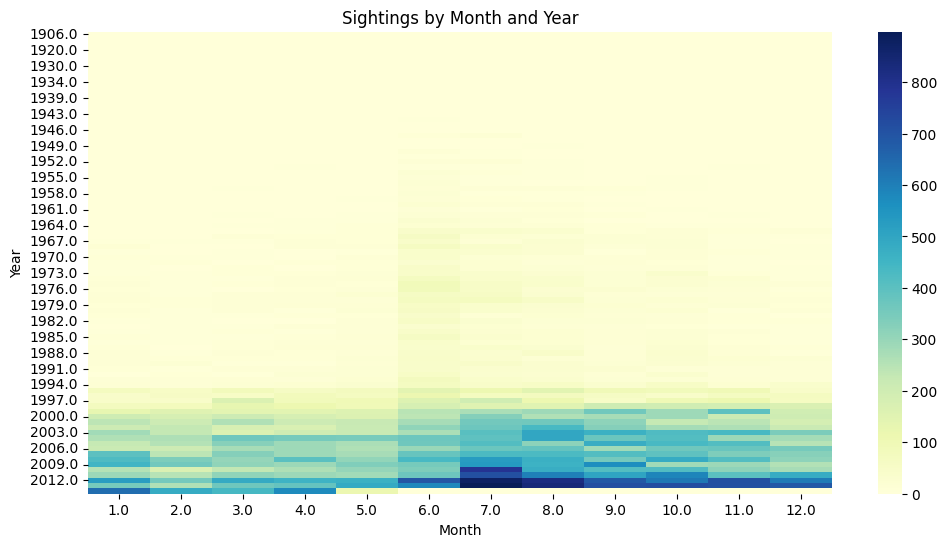

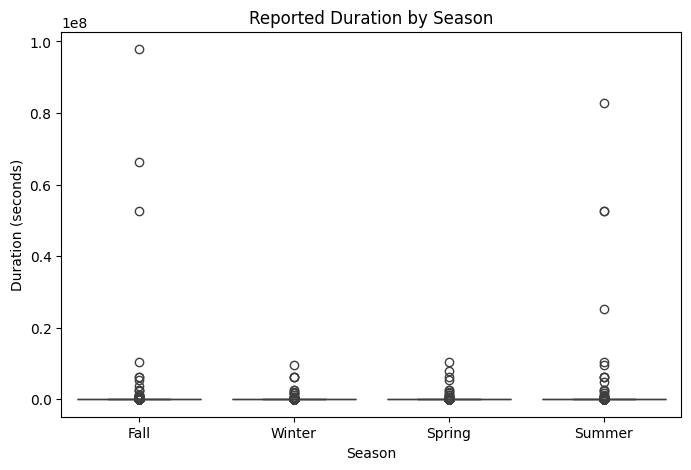

In [83]:
display("df shape: ", df.shape)
display("There are ", df['date'].nunique(), "unique dates")
display('Null Counts: ')
display(df.isnull().sum())
display("Date Range: ")
display(df['date'].min())
display(df['date'].max())
# Calculate % missing
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

# Define colors: red if >10%, otherwise gray
colors = ['red' if val > 10 else 'gray' for val in missing_pct]

# Plot
missing_pct.plot.barh(figsize=(10,6), color=colors)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Percent Missing')
plt.ylabel('Columns')
plt.show()




plt.figure()
df['date'].dt.month_name().value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).plot(kind='bar')
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Count of Sightings')
plt.xticks(rotation=45)
plt.show()

# --- 2. Frequency by Decade ---
plt.figure()
decade = (df['date'].dt.year // 10) * 10
decade.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Sightings')
plt.show()

# --- 3. Frequency by Season ---
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].dt.month.map(get_season)

plt.figure()
df['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar')
plt.title('Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Count of Sightings')
plt.show()

plt.figure(figsize=(8,5))
df['date'].dt.day_name().value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='skyblue')
plt.title('Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Sightings')
plt.show()

# only if you have a datetime column with hours
plt.figure(figsize=(10,5))
df['date'].dt.hour.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Frequency by Hour of Day')
plt.xlabel('Hour (24-hr)')
plt.ylabel('Count of Sightings')
plt.show()

plt.figure(figsize=(12,5))
df.set_index('date').resample('M').size().rolling(12).mean().plot()
plt.title('12-Month Rolling Average of Sightings')
plt.xlabel('Date')
plt.ylabel('Count (12-mo Rolling Mean)')
plt.show()

annual_counts = df.set_index('date').resample('Y').size()
rolling = annual_counts.rolling(5, center=True).mean()
yoy = rolling.pct_change() * 100

plt.figure(figsize=(10,5))
yoy.plot(color='teal')
plt.title('Smoothed Year-over-Year % Change in Sightings (5-year rolling)')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.grid(True)
plt.show()


import seaborn as sns
heat = df.groupby([df['date'].dt.year, df['date'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='YlGnBu')
plt.title('Sightings by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='duration (seconds)')
plt.title('Reported Duration by Season')
plt.xlabel('Season')
plt.ylabel('Duration (seconds)')
plt.show()

first_sighting = df.groupby('state')['date'].min().sort_values()
last_sighting = df.groupby('state')['date'].max().sort_values()


# The country column is likely the only column that has too many null values to use (> 10%)
# It apppears that there are more sightings in the summer months. 
# Frequency by decade is highly left-skewed, with most sightings happening in the 2000s 
# Also more sightings in the summer, as well.
# More sightings on saturdays than other days. 
# More sightings late at night or early in the morning. 
# Sightings have increased dramatically over time.
# YoY % change in sightings is hard to make sense of because the earlier data
# does not have many observations. 
# Filtering df to only include years >= 1995
df = df[df['date'] >= '1995-01-01']
# Then will run the same analysis in the next cell




'df shape: '

(72024, 12)

'There are '

62049

'unique dates'

'Null Counts: '

city                       0
state                   5096
country                 8340
shape                   1755
duration (seconds)         3
duration (hours/min)       0
comments                  12
date posted                0
latitude                   0
longitude                  0
date                       0
season                     0
dtype: int64

'Date Range: '

Timestamp('1995-01-01 02:00:00')

Timestamp('2014-05-08 18:45:00')

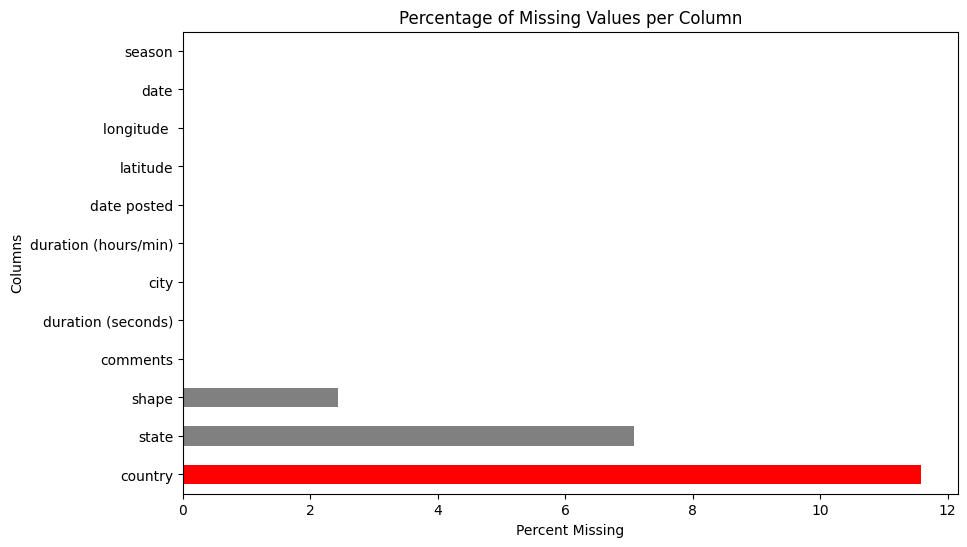

Columns with over 10% missing data (in red) may not be reliable for analysis. Most other fields appear relatively complete.


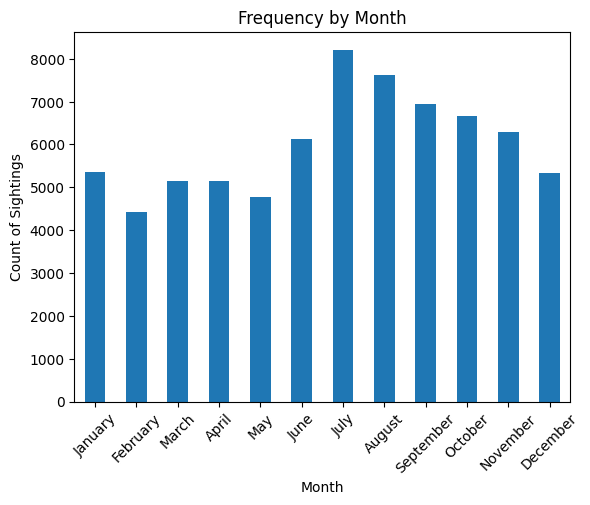

Sightings peak in mid-summer (July–August) and are lowest in winter months. This seasonality likely reflects outdoor activity and visibility.


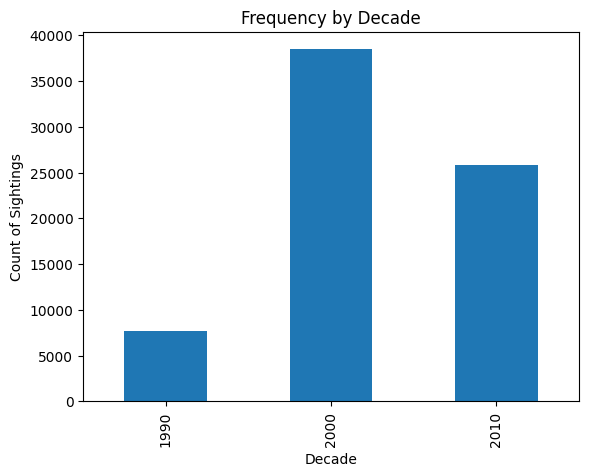

Reports increase dramatically in the 1990s and 2000s, reflecting the rise of digital submission systems and online reporting portals.


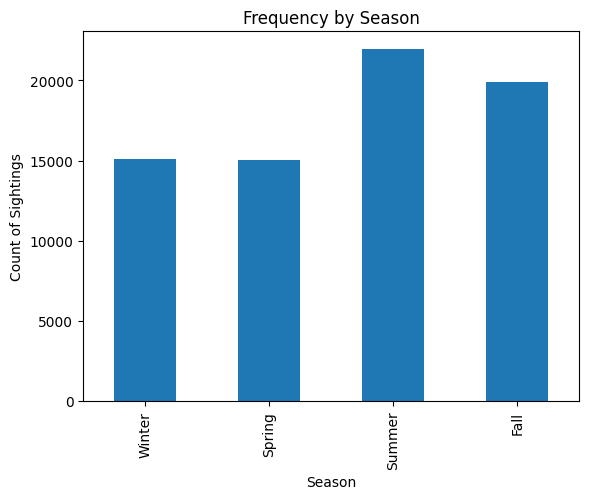

Summer shows the highest number of sightings, followed by Fall. Warmer months likely encourage more sky-watching and outdoor observation.


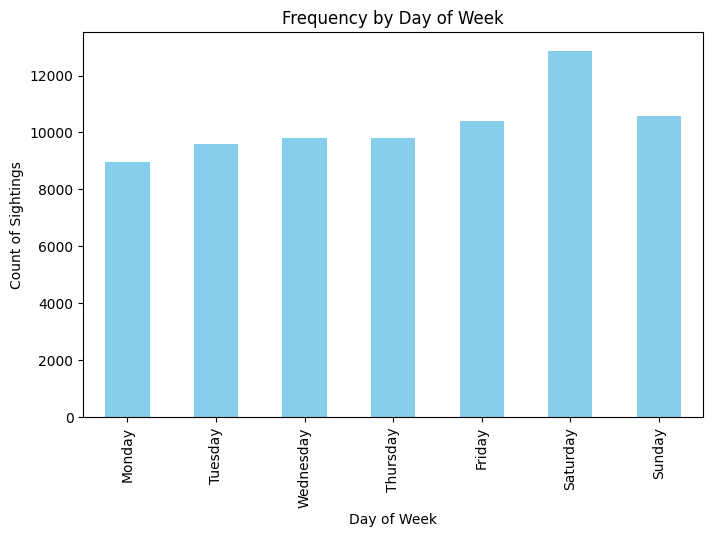

Sightings are most common on weekends, particularly Saturday, suggesting that leisure time contributes to higher reporting rates.


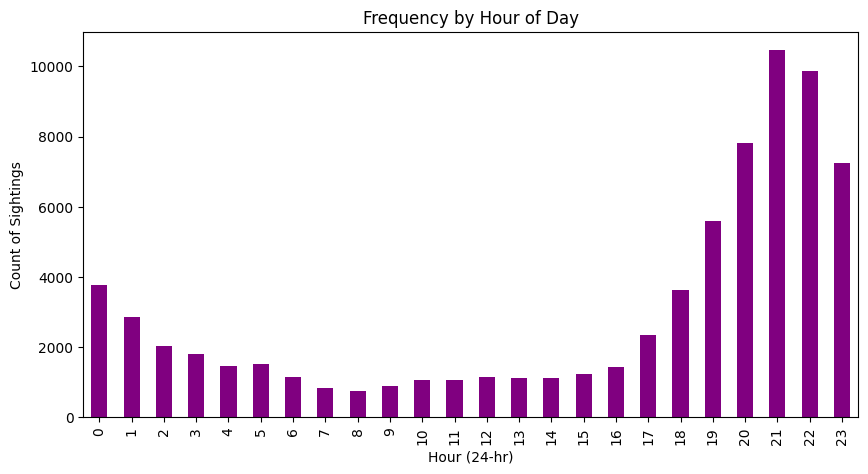

Sightings peak between 9 PM and 11 PM, when it’s dark enough to notice lights in the sky but before most people go to bed.


C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\2688543587.py:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M').size().rolling(12).mean().plot()


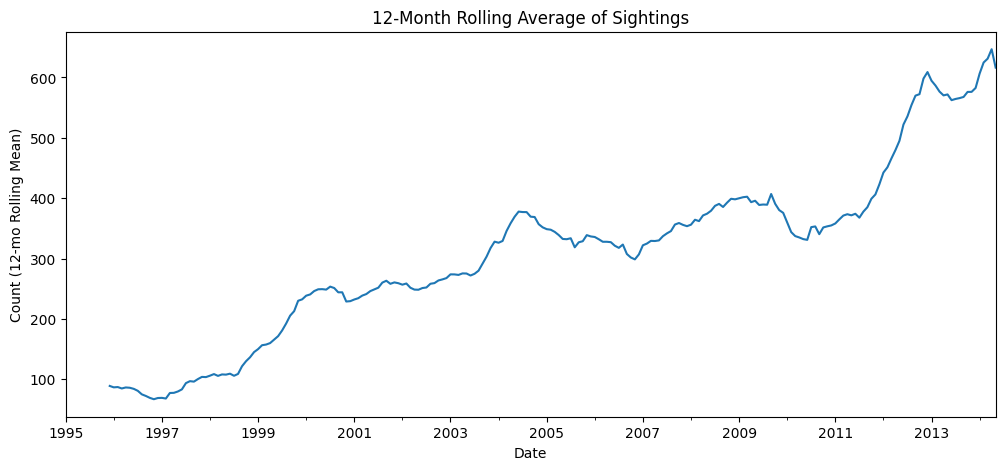

The rolling mean shows steady growth in sightings through the early 2000s, a brief dip, and a strong surge after 2010.


C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\2688543587.py:95: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_counts = df.set_index('date').resample('Y').size()
C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\2688543587.py:97: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy = rolling.pct_change() * 100


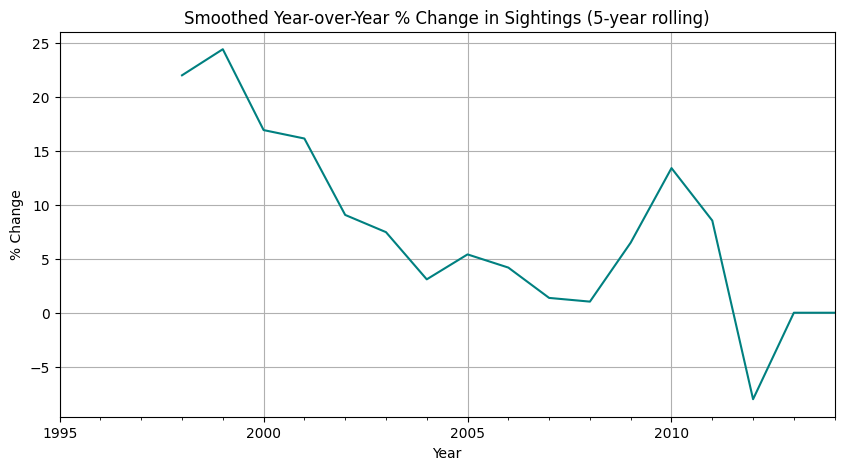

Growth rates were high in the late 1990s but slowed in the mid-2000s. After 2010, the rate of new reports began to flatten or decline.


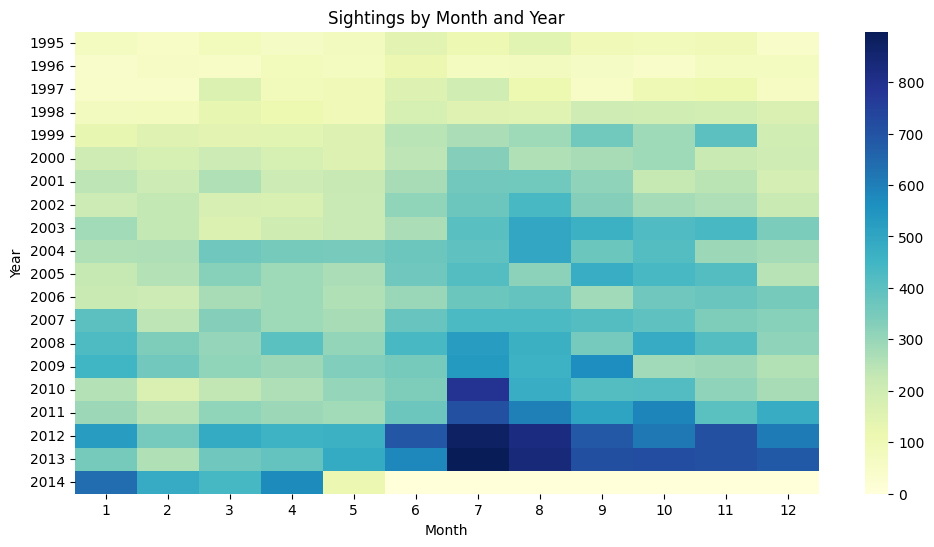

The heatmap highlights increasing sighting volume after 2005, with the strongest seasonal peaks around mid-year (June–August).


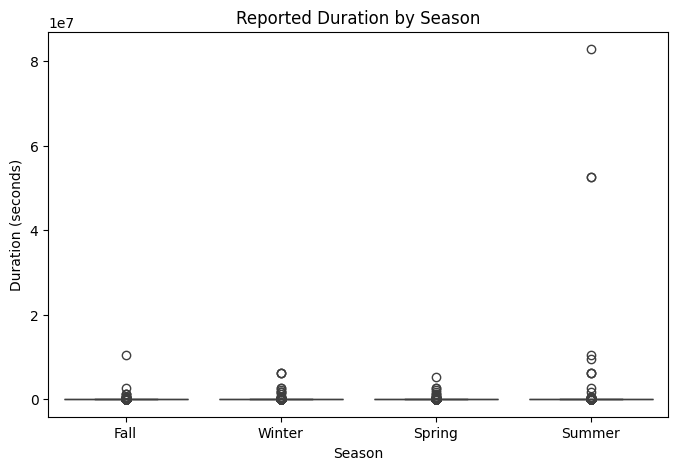

Reported durations are similar across seasons, though summer includes more extreme outliers — likely due to long or misreported events.
The earliest and latest sightings by state can help identify data coverage gaps or regions with longer reporting histories.


In [84]:
# === Summary Info ===
display("df shape: ", df.shape)
display("There are ", df['date'].nunique(), "unique dates")
display('Null Counts: ')
display(df.isnull().sum())
display("Date Range: ")
display(df['date'].min())
display(df['date'].max())

# === Missing Value Plot ===
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)
colors = ['red' if val > 10 else 'gray' for val in missing_pct]

missing_pct.plot.barh(figsize=(10,6), color=colors)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Percent Missing')
plt.ylabel('Columns')
plt.show()
print("Columns with over 10% missing data (in red) may not be reliable for analysis. Most other fields appear relatively complete.")

# === Frequency by Month ===
plt.figure()
df['date'].dt.month_name().value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).plot(kind='bar')
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Count of Sightings')
plt.xticks(rotation=45)
plt.show()
print("Sightings peak in mid-summer (July–August) and are lowest in winter months. This seasonality likely reflects outdoor activity and visibility.")

# === Frequency by Decade ===
plt.figure()
decade = (df['date'].dt.year // 10) * 10
decade.value_counts().sort_index().plot(kind='bar')
plt.title('Frequency by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Sightings')
plt.show()
print("Reports increase dramatically in the 1990s and 2000s, reflecting the rise of digital submission systems and online reporting portals.")

# === Frequency by Season ===
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].dt.month.map(get_season)

plt.figure()
df['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall']).plot(kind='bar')
plt.title('Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Count of Sightings')
plt.show()
print("Summer shows the highest number of sightings, followed by Fall. Warmer months likely encourage more sky-watching and outdoor observation.")

# === Frequency by Day of Week ===
plt.figure(figsize=(8,5))
df['date'].dt.day_name().value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='skyblue')
plt.title('Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Sightings')
plt.show()
print("Sightings are most common on weekends, particularly Saturday, suggesting that leisure time contributes to higher reporting rates.")

# === Frequency by Hour of Day ===
plt.figure(figsize=(10,5))
df['date'].dt.hour.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Frequency by Hour of Day')
plt.xlabel('Hour (24-hr)')
plt.ylabel('Count of Sightings')
plt.show()
print("Sightings peak between 9 PM and 11 PM, when it’s dark enough to notice lights in the sky but before most people go to bed.")

# === 12-Month Rolling Average ===
plt.figure(figsize=(12,5))
df.set_index('date').resample('M').size().rolling(12).mean().plot()
plt.title('12-Month Rolling Average of Sightings')
plt.xlabel('Date')
plt.ylabel('Count (12-mo Rolling Mean)')
plt.show()
print("The rolling mean shows steady growth in sightings through the early 2000s, a brief dip, and a strong surge after 2010.")

# === Smoothed Year-over-Year % Change ===
annual_counts = df.set_index('date').resample('Y').size()
rolling = annual_counts.rolling(5, center=True).mean()
yoy = rolling.pct_change() * 100

plt.figure(figsize=(10,5))
yoy.plot(color='teal')
plt.title('Smoothed Year-over-Year % Change in Sightings (5-year rolling)')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.grid(True)
plt.show()
print("Growth rates were high in the late 1990s but slowed in the mid-2000s. After 2010, the rate of new reports began to flatten or decline.")

# === Heatmap: Sightings by Month and Year ===
heat = df.groupby([df['date'].dt.year, df['date'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='YlGnBu')
plt.title('Sightings by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
print("The heatmap highlights increasing sighting volume after 2005, with the strongest seasonal peaks around mid-year (June–August).")

# === Duration by Season ===
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='duration (seconds)')
plt.title('Reported Duration by Season')
plt.xlabel('Season')
plt.ylabel('Duration (seconds)')
plt.show()
print("Reported durations are similar across seasons, though summer includes more extreme outliers — likely due to long or misreported events.")

# === First/Last Sightings by State ===
first_sighting = df.groupby('state')['date'].min().sort_values()
last_sighting = df.groupby('state')['date'].max().sort_values()
print("The earliest and latest sightings by state can help identify data coverage gaps or regions with longer reporting histories.")

In [80]:
df.columns

Index(['city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'date', 'season'],
      dtype='object')

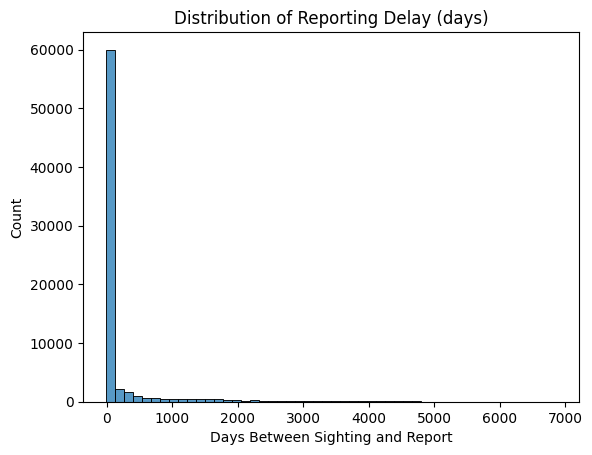

In [85]:
df['report_delay_days'] = (df['date posted'] - df['date']).dt.days
sns.histplot(df['report_delay_days'], bins=50)
plt.title('Distribution of Reporting Delay (days)')
plt.xlabel('Days Between Sighting and Report')
plt.show()


Text(0.5, 1.0, 'Autocorrelation of Daily Sightings')

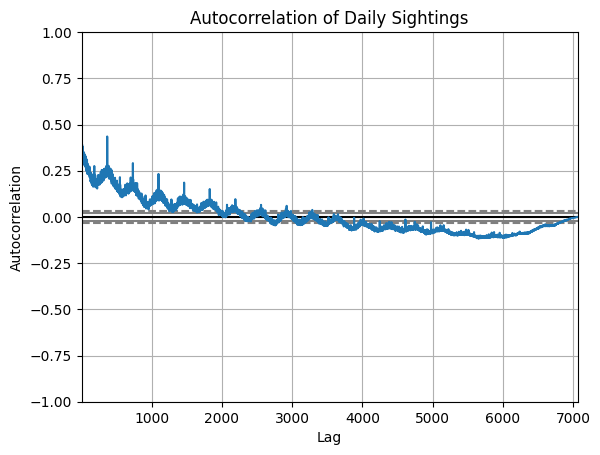

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.set_index('date').resample('D').size())
plt.title('Autocorrelation of Daily Sightings')
# The autocorrelation plot shows a gradual decay with small repeating peaks,
# meaning UFO sightings exhibit mild temporal dependence — days near each other
# tend to have somewhat similar counts (short-term clustering), but the correlation
# weakens steadily as lag increases. The small periodic bumps may indicate weak
# seasonal or cyclical patterns (e.g., annual seasonality). Overall, the data are
# not strongly autocorrelated, suggesting daily sightings behave mostly independently
# over long time spans, aside from short bursts or recurring yearly effects.

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\312166547.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sightings = df.set_index('date').resample('M').size()


Text(0.5, 1.0, 'Change in Monthly Sightings Over Time')

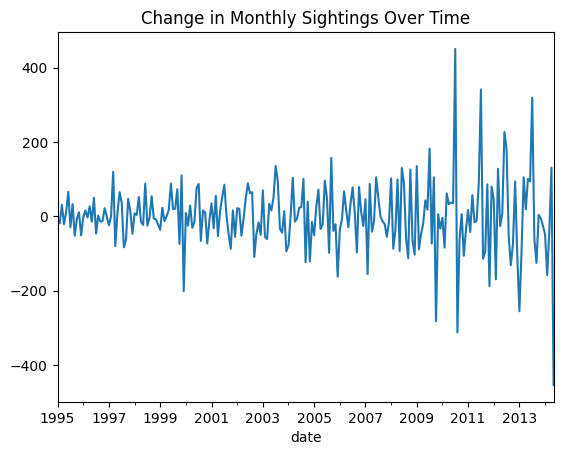

In [87]:
import numpy as np
sightings = df.set_index('date').resample('M').size()
sightings_diff = sightings.diff()
sightings_diff.plot()
plt.title('Change in Monthly Sightings Over Time')


<Axes: xlabel='date', ylabel='city'>

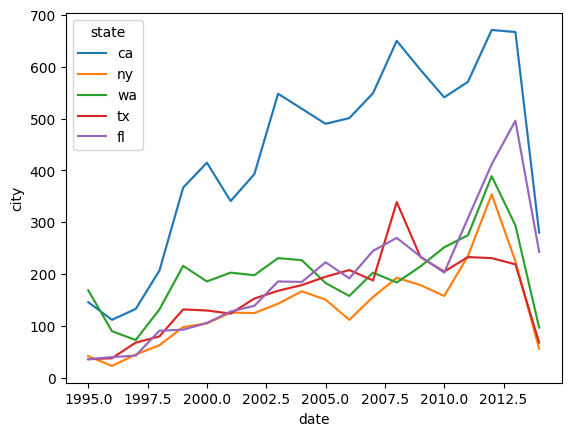

In [88]:
top_states = df['state'].value_counts().head(5).index
subset = df[df['state'].isin(top_states)]
sns.lineplot(data=subset, x=df['date'].dt.year, hue='state',
             y=subset.groupby([subset['date'].dt.year, subset['state']])['city'].transform('count'))


In [89]:
# Prepare features
monthly = df.set_index('date').resample('M').size().reset_index(name='count')
monthly['month'] = monthly['date'].dt.month
monthly['year'] = monthly['date'].dt.year

# Simple linear model: trend + seasonality
import statsmodels.formula.api as smf
model = smf.ols('count ~ year + C(month)', data=monthly).fit()
print(model.summary())


C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\2865394550.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date').resample('M').size().reset_index(name='count')


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     56.53
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           2.33e-60
Time:                        14:13:37   Log-Likelihood:                -1368.6
No. Observations:                 233   AIC:                             2763.
Df Residuals:                     220   BIC:                             2808.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.862e+04   2075.154    -23.

C:\Users\bdupey\AppData\Local\Temp\ipykernel_58516\3851060283.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sightings = df.set_index('date').resample('M').size()


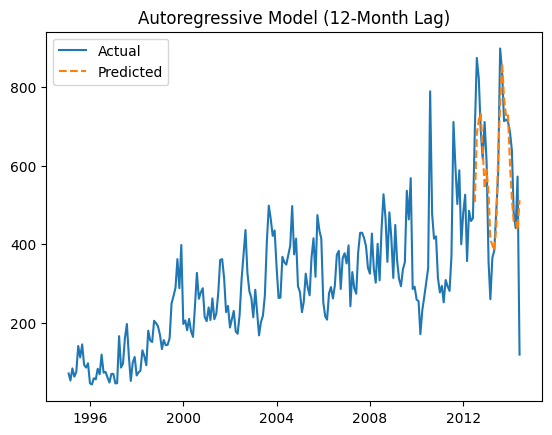

In [90]:
from statsmodels.tsa.ar_model import AutoReg

sightings = df.set_index('date').resample('M').size()
model = AutoReg(sightings, lags=12).fit()
pred = model.predict(start=len(sightings)-24, end=len(sightings)-1, dynamic=False)

plt.plot(sightings, label='Actual')
plt.plot(pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Autoregressive Model (12-Month Lag)')
plt.show()


In [91]:
monthly['change_flag'] = (monthly['count'].diff() > 0).astype(int)
monthly['prev_count'] = monthly['count'].shift(1)
monthly = monthly.dropna()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = monthly[['prev_count', 'month', 'year']]
y = monthly['change_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.68      0.62      0.65        21

    accuracy                           0.70        47
   macro avg       0.70      0.69      0.70        47
weighted avg       0.70      0.70      0.70        47

